<a href="https://colab.research.google.com/github/remidu34/Mnist/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import numpy as np

In [ ]:

print(tf.__version__)
#print(plt.__version__)

2.13.0


In [ ]:
# Chargement des données de Mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print("Taille de l'ensemble d'entraînement (images) :", train_images.shape)
print("Taille de l'ensemble d'entraînement (étiquettes) :", train_labels.shape)
print("Taille de l'ensemble de test (images) :", test_images.shape)
print("Taille de l'ensemble de test (étiquettes) :", test_labels.shape)

Taille de l'ensemble d'entraînement (images) : (60000, 28, 28)
Taille de l'ensemble d'entraînement (étiquettes) : (60000,)
Taille de l'ensemble de test (images) : (10000, 28, 28)
Taille de l'ensemble de test (étiquettes) : (10000,)


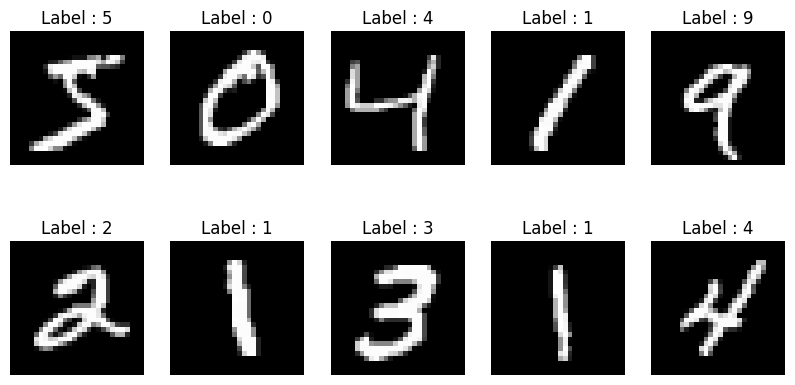

In [ ]:
# Affichage des premières 10 images du jeu de données MNIST pour vérifier si j'ai bien des données
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label : {train_labels[i]}')
    plt.axis('off')
plt.show()

In [ ]:
# Prétraitement des données
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Création modèle CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compiler le modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entraînement modèle
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 48s 50ms/step - loss: 0.1844 - accuracy: 0.9441
Epoch 2/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0491 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0284 - accuracy: 0.9912
Epoch 5/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0220 - accuracy: 0.9933


In [ ]:
# Résultat modèle
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy : {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0272 - accuracy: 0.9914
Accuracy : 0.9914000034332275


In [ ]:
# Test de prédiction d'un Mnist

In [ ]:
# Chargez votre image personnalisée ici
custom_image = Image.open("/content/Images/ToPredict/sixletter.png")

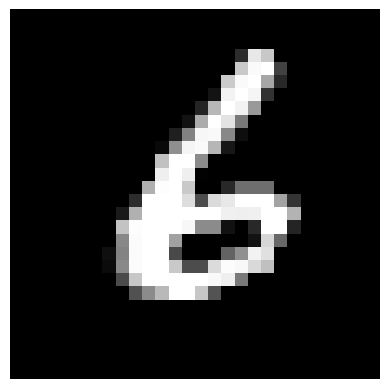

In [ ]:
# Affichez l'image
plt.imshow(custom_image, cmap='gray')
plt.axis('off')  # Pour masquer les axes
plt.show()

In [ ]:
# Convertissez l'image en niveaux de gris comme les entrainements
custom_image = custom_image.convert("L")

In [ ]:
# Ajoutez une dimension de canal pour obtenir la forme requise
custom_image = np.array(custom_image)[:, :, np.newaxis]

In [ ]:
# Redimensionnez l'image à la taille attendue (28x28)
custom_image = image.smart_resize(custom_image, (28, 28))

In [ ]:
# Normalisez l'image
custom_image = custom_image.astype('float32') / 255

In [ ]:
# Prédiction pour chaque classe dans predicted_label
predicted_label = model.predict(np.expand_dims(custom_image, axis=0))

1/1 [==============================] - 0s 23ms/step


In [ ]:
# Récupération de la classe avec la valeur maxi
predicted_class = np.argmax(predicted_label)

In [ ]:
# Obtenez le pourcentage de confiance pour la classe prédite
confidence = np.max(predicted_label) * 100

In [ ]:
# Classe prédicte et % de prédiction
print(f'Classe prédite : {predicted_class}')
print(f'Pourcentage de confiance : {confidence:.2f}%')

Classe prédite : 6
Pourcentage de confiance : 100.00%
